In [47]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import seaborn as sns # Creación gráficos estadísticos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import metrics



In [49]:
import warnings
warnings.simplefilter(action='ignore')

In [51]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('./OneDrive - Universidad Nacional Abierta y a Distancia/6 semestre/Analisis_De_Datos/Tarea_3/heart_cleveland_upload.csv')

In [53]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(300)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [55]:
# Descripción de los datos
Datos.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

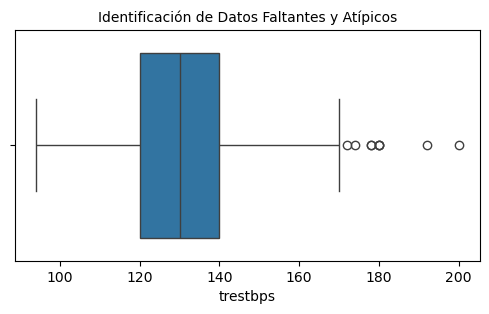

In [57]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [58]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en age : ",Datos['age'].isin([0]).sum())
print("Cantidad de Registros con cero en sex: ",Datos['sex'].isin([0]).sum())
print("Cantidad de Registros con cero en cp	: ",Datos['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en trestbps: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en chol: ",Datos['chol'].isin([0]).sum())

Cantidad de Registros con cero en age :  0
Cantidad de Registros con cero en sex:  96
Cantidad de Registros con cero en cp	:  23
Cantidad de Registros con cero en trestbps:  0
Cantidad de Registros con cero en chol:  0


In [61]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['age']=Datos['age'].replace(0,Datos['age'].mean())
Datos['sex']=Datos['sex'].replace(0,Datos['sex'].mean())
Datos['cp']=Datos['cp'].replace(0,Datos['cp'].mean())
Datos['trestbps']=Datos['trestbps'].replace(0,Datos['trestbps'].mean())
Datos['chol']=Datos['chol'].replace(0,Datos['chol'].mean())

In [63]:
#Revisión nuevamente los datos faltantes
print("Cantidad de Registros con cero en age : ",Datos['age'].isin([0]).sum())
print("Cantidad de Registros con cero en sex: ",Datos['sex'].isin([0]).sum())
print("Cantidad de Registros con cero en cp	: ",Datos['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en trestbps: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en chol: ",Datos['chol'].isin([0]).sum())

Cantidad de Registros con cero en age :  0
Cantidad de Registros con cero en sex:  0
Cantidad de Registros con cero en cp	:  0
Cantidad de Registros con cero en trestbps:  0
Cantidad de Registros con cero en chol:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

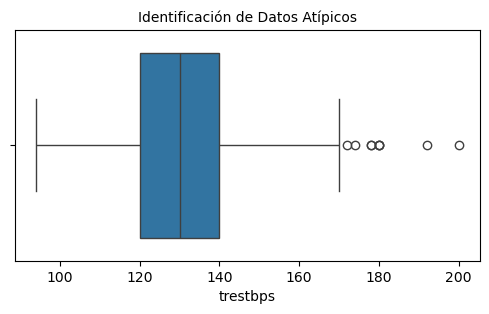

In [64]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [66]:
#Conteo de Datos Atípicos
nivel_minimo=10
nivel_maximo=200
Total_Atipicos=((Datos['trestbps']<nivel_minimo)|(Datos['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [68]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Datos['trestbps']<nivel_minimo)|(Datos['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [71]:
#Revisión del tipo de datos y datos faltantes
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    float64
 2   cp         297 non-null    float64
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 32.6 KB


In [80]:
Datos['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [83]:
Datos[['condition']].head(40)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


In [87]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento
X = Datos.drop('condition',axis=1) 
Y = Datos['condition'] 

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [89]:
print (X_train)

     age       sex   cp  trestbps  chol  fbs  restecg  thalach  exang  \
234   56  0.676768  3.0       200   288    1        2      133      1   
82    66  0.676768  2.0       146   278    0        2      152      0   
36    56  1.000000  1.0       120   240    0        0      169      0   
237   56  1.000000  3.0       132   184    0        2      105      1   
133   47  1.000000  2.0       108   243    0        0      152      0   
..   ...       ...  ...       ...   ...  ...      ...      ...    ...   
291   40  1.000000  3.0       110   167    0        2      114      1   
195   61  0.676768  3.0       130   330    0        2      169      0   
170   65  0.676768  3.0       150   225    0        2      114      0   
135   46  0.676768  2.0       142   177    0        2      160      1   
293   39  1.000000  3.0       118   219    0        0      140      0   

     oldpeak  slope  ca  thal  
234      4.0      2   2     2  
82       0.0      1   1     0  
36       0.0      2   0    

In [91]:
print (Y_train)

234    1
82     0
36     0
237    1
133    1
      ..
291    1
195    1
170    1
135    0
293    1
Name: condition, Length: 222, dtype: int64


In [93]:

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test)

In [95]:
print (Y_test)

185    1
157    1
110    0
39     0
198    1
      ..
278    0
163    1
137    0
33     1
246    1
Name: condition, Length: 75, dtype: int64


In [97]:
print (Prediccion)

[1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 1]


In [99]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        40
           1       0.91      0.86      0.88        35

    accuracy                           0.89        75
   macro avg       0.90      0.89      0.89        75
weighted avg       0.89      0.89      0.89        75



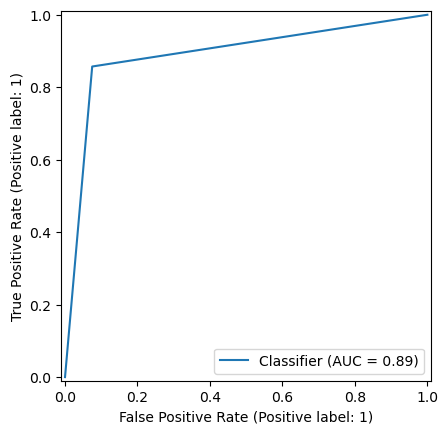

In [101]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()